# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance

```
by Seokkyu Kong
Date: 2016-03-27
Summary: Coursera 코세라 machine learning 기계학습 강의 연습문제 5번을 Octave에서 Python으로 code migration 한다.
```

## Introduction

이 연습문제에서는 regularized linear regression을 구현하고 그것을 사용해서 서로 다른 bias-variance 특성을 갖는 모델을 공부한다

## 1. Regularized Linear Regression

연습문제의 전반부에서는 댐 안에 있는 물의 수위를 조정해서 댐에서 방출되는 물의 양의 예측하기 위해 regularized linear regression을 구현한다. 후반부에서는 learning algorithm을 디버깅하는 진단기법을 가지고 bias 대 variance의 효과를 검토한다.

### 1.1 Visualizing the dataset

우리는 수위 변화를 x로 기록하고 댐 밖으로 나간 물의 양을 y로 담고 있는 dataset을 visualizing하면서 시작한다.
이 데이터셋은 3개의 부분으로 나뉜다.

- 모델이 학습하게될 training set: X, y
- regularization paramter를 결정하기 위한 cross validation set: Xval, yval
- 성능을 평가하게 될 test set. 이것들은 "unseen" "본적이 없는" examples인데 모델이 training 동안 본적인 없는 데이터들이다: Xtest, ytest

ex5.m의 다음 단계는 training data를 그릴 것이다. (그림 1). 다음 부분에서, linear regression을 구현하고 직선을 data에 적합시키기 위해서 사용하고 learning curves 학습곡선을 그릴 것이다. 그 다음에, 데이터에 더 잘 맞는 것을 찾기 위해 polynomial regression을 구현할 것이다.


In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


In [41]:
# Part 1: Loading and Visualizing Data
# 우리는 데이터셋을 로딩하고 가시화함으로써 연습문제를 시작한다.
# 다음 코드는 데이터셋을 당신의 환경으로 로드하고 데이터를 표시할 것이다.

print('Loading and Visualizing Data ...')

mat_content = sio.loadmat('ex5data1.mat')
X = mat_content['X']
y = mat_content['y'].flatten() # (12, 1) => (12,)로 변환한다. 즉, 2차배열이 아닌 1차배열로 취급
Xval = mat_content['Xval']
yval = mat_content['yval'].flatten()
Xtest = mat_content['Xtest']
ytest = mat_content['ytest'].flatten()


Loading and Visualizing Data ...


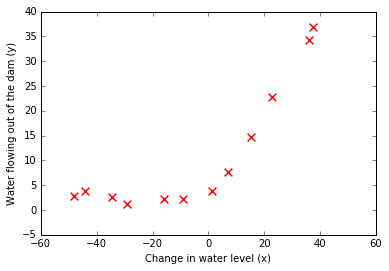

In [42]:
# m = Number of examples
m = X.shape[0]

# Plot training data
# XXX: c: color, marker, s:size, lw:linewidth
plt.scatter(X, y, c='r', marker='x', s=60, lw=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

### 1.2 Regulized linear regression

regularized linear regression는 다음의 cost 함수를 갖는다.

여기서 lambda는 regularization 파라미터인데 regularization의 정도를 제어한다.(overffiting을 방지하는데 도움이 된다. ) __regularization 항목은 전체 cost J 상에 penalty를 부여한다. 모델 파라미터 theta_j의 규모가 커질수록, penalty또한 증가한다. theta_0 항목은 regularize하면 안된다.__ 

이제 linearRegCostFunction.m 파일 내의 코드를 완성하라. regularized linear regression cost 함수를 계산하는 함수를 작성한다. 만약 가능하다면 loop 작성을 피하고 코드를 벡터화 하도록 노력해라. 완성한 후, ex5.m 의 다음 단계에서 [1; 1]로 초기화된 theta를 사용해서 cost 함수를 실행할 것이다. 출력이 303.993이 나와야 한다.

In [61]:
# Part 2: Regularized Linear Regression Cost
# 이제 regularized linear regression에 대한 cost 함수를 구현한다.

def linearRegCostFunction(X, y, theta, s_lambda):
    """
    데이터 포인트 X, y에 적합한 linear regression을 위한 파라미터로 theta를 사용해서 
    cost를 계산한다.
    """
    
    m = np.size(y) # training examples 갯수
    
    # 다음 변수를 올바르게 반환해야 한다.
    J = 0
    grad = np.zeros(np.size(theta))
    
    # 특별히 선택된 theta에 대해서 regularized linear regression의
    # cost와 gradient를 계산한다.
    
    """
    a = np.array([[1], [2], [3]])
    np.size(a)

    b = np.array([3, 3, 3])

    b - a

    np.array: (3,) - (1, 3) = 3x3    
    """
    # 1.2 regularized linear regression cost 구하기
    prediction = X.dot(theta)
    error = prediction - y
        
    sqrError = error ** 2
    
    J = 1/(2*m) * np.sum(sqrError)
    
    # regularization term 값을 구한다.
    sum_theta_square = np.sum(np.sum(theta[1:] ** 2))
    reg_term = s_lambda/(2*m) * sum_theta_square
    
    # reg_term을 합한다.
    J = J + reg_term

    # 1.3 regularized linear regression gradient를 구한다.
    # theta_0에 대한 편미분값을 구한다. delta_0는 scalar값이다.
    delta_0 = 1/m * error.dot(X[:,0]) # X의 첫번째 컬럼(bias)에 대해서 계산
    
    # theta_j에 대한 편미분값을 구한다.
    delta = 1/m * error.dot(X[:,1])
    regular = s_lambda/m * theta[1:]
    delta_j = delta.T + regular
    
    grad = np.append(delta_0, delta_j)
    
    return J, grad

theta = np.array([1, 1])
X_1 = np.column_stack((np.ones(m), X))
J, grad = linearRegCostFunction(X1, y, theta, 1)

print('Cost at theta = [1; 1]: %s' % J)
print('(this value should be about 303.993192)')


Cost at theta = [1; 1]: 303.99319222
(this value should be about 303.993192)


### 1.3 Regularized linear regression gradient

theta_j에 대해서 regularized linear regression의 cost에 대한 편미분값은 다음과 같이 정의된다.

linearRegCostFunction.m에서, gradient를 계산하는 코드를 추가하고 변수 grad에 넣어서 반환해라. 완성하면 ex5.m의 다음 부분에서 [1; 1]로 초기화된 theta를 사용해서 gradient 함수를 실행할 것이다.

gradient는 [-15.30; 598.250]이 됨을 보아야 한다.

In [62]:
# Part 3: Regularized Linear Regression Gradient
# 이제 regularized linear regression에 대한 gradient를 구현한다.

theta = np.array([1, 1])
J, grad = linearRegCostFunction(X_1, y, theta, 1)

print('Gradient at theta = [1 ; 1]:  [%s; %s] ', grad[0], grad[1])
print('(this value should be about [-15.303016; 598.250744])')


Gradient at theta = [1 ; 1]:  [%s; %s]  -15.3030156742 598.250744173
(this value should be about [-15.303016; 598.250744])


### 1.4 Fitting linear regression

일단 cost 함수와 gradient가 올바르게 동작하며, ex5.m의 다음 부분에서 trainLinearReg.m을 실행해서 theta의 최적값을 계산한다. training 함수는 cost 함수를 최적화하기 위해 fmincg를 사용한다.

이 부분에서 우리는 regularization parameter lambda를 0으로 설정하다. __우리의 linear regression 현재 구현이 2차원 theta를 fit하려고 하기 때문에, regularization은 그와 같이 낮은 차원의 theta에 대해 크게 도움되지는 않는다.__ 연습문제 다음 부분에서 regularization을 갖는 polynomial 다항식 regression을 사용하게 될 것이다.

마지막으로, ex5.m 스크립트는 또한 best fit line을 그리는데 결과는 그림 2와 비슷한 이미지이다. best fit line은 모델이 데이터 적합에 좋지 않음을 말해준다. 왜냐하면 데이터는 비선형 패턴을 가지고 있기 때문이다. __best fit을 가시화 해서 보여주는 것은 learning algorithm을 디버그 하는 한가지 방법이다. 다음 섹션에서 learning curve를 생성하는 함수를 구현하는데 그것은 가시화하기 쉽지 않더라도 learning algorithm을 디버그하는데 도움을 준다.__

[ 13.08790262   0.36777922]


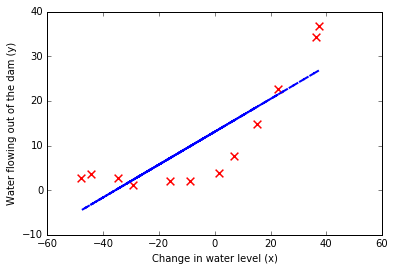

In [165]:
# Part 4: Train Linear Regression
# 일단 cost와 gradient를 올바르게 구현했다면 trainLinearReg 함수가
# regularized linear regression을 훈련시키기 위해서 cost함수를 사용할 것이다.
# Write Up Note: data가 non-linear이기 때문에 이것은 훌륭하게 맞지(fit) 않는다.

import scipy.optimize as op

def trainLinearReg(X, y, s_lambda, method='CG', maxiter=200):
    """
    데이터넷 (X, y) 그리고 lambda가 주어졌을 때 linear regression을 
    훈련시킨다.
    훈련된 파라미터 theta를 반환한다.
    """
    
    # Theta를 초기화한다.
    initial_theta = np.zeros(X.shape[1])
    
    # 최소화할 cost 함수에 대한 "short hand"를 생성한다.
    costFunc = lambda t: linearRegCostFunction(X, y, t, s_lambda)[0]
    gradFunc = lambda t: linearRegCostFunction(X, y, t, s_lambda)[1]
    
    # **********************************************************************************
    # XXX: jac=None이 아니고 jac=gradFunc 일 경우 theta의 값이 달라진다. 왜 그렇지??? -_-;
    # **********************************************************************************
    # 이제 costFunction은 다 하나의 인자만 받게 된다.
    Result = op.minimize(fun = costFunc, x0 = initial_theta, \
                     method = method, jac = None, options = {'disp': False, 'maxiter': maxiter});
    theta = Result.x
    
    return theta
    

# lambda=0인 linear regression을 훈련시킨다.
s_lambda = 0
theta = trainLinearReg(X_1, y, s_lambda)

"""
theta =

   13.08790
    0.36778
"""
print(theta)

# data를 그려본다.
plt.scatter(X, y, c='r', marker='x', s=60, lw=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plot(X, X_1.dot(theta), '--', lw=2.0)

## 2. Bias-variance

__머신러닝에 있어서 한가지 중요한 개념은 bias-variance tradeoff이다. high bias를 가진 모델은 데이터에 대해서 충분히 복잡하지 않고 underfit 경향이 있다. 반면에 high variance를 가진 모델은 training data에 overfit 과적합 하게 된다.__

이 연습문제에서는 bias-variance 문제를 진단하기 위해 learning curve 학습곡선 상에서 training 과 test errors를 그리린다.

### 2.1 Learning curves

이제 learning algorithms을 디버깅할 때 도움이 되는 learning curve를 생성하는 코드를 작성하게 된다. 학습곡선은 training set 크기의 함수로써 training과 cross validation error를 그린다. __당신의 작업은 learningCurve.m 이 training set과 cross validation set에 대한 에러 벡터를 반환하게 만드는 것이다.__

학습곡선을 그리기 위해서, 우리는 서로 다른 training set 크기에 대한 training과 cross validation set에 대한 에러가 필요하다. __서로 다른 training set 크기를 얻기 위해, 원본의 training set X에 대한 서로 다른 subset을 사용해야 한다. 특별히 training set size가 i에 대해서 처음부터 i번째 exmaples를 사용한다. (예, X(1:i, :) 그리고 y(1:i)).__

__파라미터 theta를 찾기 위해서 trainLinearReg 함수를 사용할 수 있다.__ lambda는 learningCurve 함수에 파라미터로 전달됨을 주목하라. 파라미터 theta를 학습한 이후에, training과 cross validation set 상에서 error를 계산해야 한다. dataset에 대한 training error는 다음과 같이 정의된다.

__특히, training error는 regularization term을 포함하지 않음을 주목해라. training error를 계산하는 한 가지 방법은 기존의 cost 함수를 사용하고 lambda를 0으로 설정하는 것인데 training error와 cross validation erorr를 계산할 때만이다.__ training set error를 계산할 때, training subset 상에서 계산하고 있음을 확인해라. (예를 들어, X(1:n, :) 그리고 y(1:n)) (전체 training set이 아니다). __하지만, cross validation error에 대해서는 전체 cross validation set 상에서 계산한다.__ 계산된 에러를 error_train과 error_val에 저장한다.

ex5.m을 마치면 학습곡선을 출력하는데 그림 3과 비슷한 plot을 만들것이다.

그림 3에서, __training example의 수가 증가함에 따라 train error와 cross validation error 모두 높다는 것을 볼 수 있다. 이것은 모델에 있어서 high bias 문제를 나타낸다.__ - linear regression model이 너무 단순해서 우리의 dataset에 잘 맞지 않는다. 다음 섹션에서 이 데이터셋을 위한 더 좋은 모델을 맞추기 위해 polynomial 다항식 regression을 구현할 것이다.

# Training Examples	Train Error	Cross Validation Error
0	0.000000	205.121110
1	0.000000	110.300412
2	3.286595	45.010230
3	2.842678	48.368910
4	13.154049	35.865165
5	19.443963	33.829961
6	20.098522	31.970986
7	18.172859	30.862448
8	22.609405	31.135995
9	23.261462	28.936208
10	24.317250	29.551433
11	22.373906	29.433819


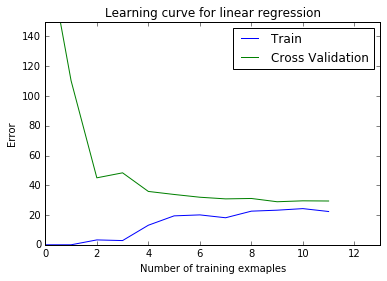

In [173]:
# Part 5: Learning Curve for Linear Regression
# 다음 차례로, learningCurve 함수를 구현한다.
# Write Up Note: model이 데이터에 대해서 underfitting이기 때문에
# 그래프는 "high bias"를 가진다. -- slide 8 in ML-advice.pdf

def learningCurve(X, y, Xval, yval, s_lambda):
    """
    학습곡선을 그리기 위해서 train과 cross validation set error를 생성한다. 
    특히, 두개의 벡터는 같은 길이이다. (error_train과 error_val)
    error_train(i)는 i examples에 대한 training errors를 포함한다.
    (그리고 error_val(i)에 대해서도 유사하다.)
    
    이 함수에서는 데이터넷 크기가 1에서 m까지 증가함에 따라 train과 test의 error를 계산한다.
    실무에서 거대한 데이터셋을 가지고 작업할 때, 좀더 큰 간격으로 이것을 하고 싶을 것이다.
    """
    
    m = X.shape[0]
    
    # 아래 변수를 올바르게 반환해야 한다.
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    """
    training error는 error_train에 저장하고 cross validation error는 
    error_val에 저장하라. 예를 들어 error_tain(i)와 error_val(i)는 
    i examples를 훈련시킨 이후에 얻어진 에러값이다.
    
    cost 함수로 linearRegCostFunctionㅇ르 사용해서 training과 cross validation error를 
    계산한다면, 함수 호출하면서 lambda는 0으로 설정한다.
    
    theta 파라미터를 얻기 위해 training을 실행시킬 때는 lambda를 사용할 필요가 있음을 주의해라.
    
    Hint: 다음과 같이 examples에 대해서 loop를 사용할 수 있다.
    """
    
    # X: bias 컬럼이 추가된 상태로 함수가 호출된다.
    for i in np.arange(m):
        X_train = X[0:i + 1, :]
        y_train = y[0:i + 1]
        
        # train 시킬때는 함수에서 전달된 파라미터 lambda를 그대로 사용한다.
        theta = trainLinearReg(X_train, y_train, s_lambda)
        
        J = linearRegCostFunction(X_train, y_train, theta, 0)[0]
        error_train[i] = J;
        
        J = linearRegCostFunction(Xval, yval, theta, 0)[0]
        error_val[i] = J
        
    return error_train, error_val
    
s_lambda = 0

Xval_1 = np.column_stack((np.ones((Xval.shape[0])), Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, s_lambda)

plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend(('Train', 'Cross Validation'), loc="upper right")
plt.xlabel('Number of training exmaples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 150)

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in np.arange(m):
    print('%d\t%f\t%f' % (i, error_train[i], error_val[i]))

## 3. Polynomial regression

__우리의 linear model이 가진 문제점은 그것이 너무 단순해서 underfitting (high bias) 를 일으킨다는 것이다. 연습문제의 이 부분에서는 더욱 많은 feature를 추가하면서 이 문제를 설명한다.__

polynomial regression을 사용하기 위해서, 우리의 가설(함수)는 다음과 같은 형태를 갖는다:

x1 = (waterLeval), x2 = (waterLevel)^2, ,,, xp = (waterLevel)^p로 정의함을 주목해라. 우리는 우리는 linear regression model를 구하는데 여기서 feature는 원래 값(waterLevel)의 다양한 지수가 된다.

이제, 당신은 데이터셋에 있는 기존 feature x의 더 높은 차수의 지수를 사용하는 feature들을 추가하게 될 것이다.
당신의 작업은 plyFeatures.m 내의 코드를 완성하는 것이다. 이 함수는 원래 training set X의 크기 m x 1을 더 높은 지수로 매핑한다. 특히, mx1 크기의 training set이 함수에 전달되면, 함수는 mxp 행렬인 X_poly를 반환해야 하는데, 컬럼 1은 X의 원래 값을 유지하고, 컬럼 2는 X .^ 2를, 컬럼 3은 X .^3를 유지한다. (쭉~) 함수 내에서 0에 대한 지수를 설명할 필요는 없다. 

이제 당신은 고차원으로 feature를 매핑하는 함수를 가질 것이고, ex5.m의 Part 6는 training set, test set, cross validation set에 적용할 것이다.

In [167]:
# Part 6: Feature Mapping for Polynomial Regression
# 이것에 대한 한 가지 솔루션은 polynomial regression을 사용하는 것이다. 
# 이제 각각의 example을 지수승으로 매핑하는 plyFeatures를 완성해야 한다.

def featureNormalize(X):
    """
    피쳐 정규화 함수: 각각의 피쳐는 단위가 다르기 때문에 평균이 0이고 표준편차가 1인
    정규화 값으로 변환된다.
    """
    # *******************************************************************
    # XXX: MATLAB의 std는 N-1을 한다. numpy의 std는 기본이 N을 사용한다.
    # ddof 값이 주어지면 N - ddof를 사용하게 된다.
    # *******************************************************************
    # 0은 column 단위 연산, 1은 row 단위 연산 적용
    mu = np.mean(X, 0)
    sigma = np.std(X, axis=0, ddof=1)
    
    # np.tile()을 사용하나 그냥 사용하나 동일한 결과이다.
    # X_norm = (X_norm - np.tile(mu, (m, 1))) / np.tile(sigma, (m, 1))    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma



def polyFeatures(X, p):
    """
    데이터 행렬 X를(mx1 크기) 이용해서 각각의 example을 다항식 feature로 매핑한다.
    X_poly(i, :) = [X(i), X(i).^2, X(i).^3,,,X(i).^p]
    """

    # 다음 변수값을 올바르게 반환해야 한다.
    X_poly = np.zeros((np.size(X), p))
    
    # 1차 벡터 X에 p차 feature를 추가해서 mxp차 행렬을 구축한다.
    for i in np.arange(p):
        X_poly[:, i] = X[:, 0] ** (i+1)
        
    return X_poly
p = 8

# X를 다항식 feature로 매핑하고 정규화한다.
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.column_stack((np.ones(m), X_poly))

# X_poly_test를 매핑하고 정규화한다. (mu와 sigma를 사용한다.)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_test))

# X_poly_val을 매핑하고 정규화한다.
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.column_stack((np.ones(X_poly_val.shape[0]), X_poly_val))

"""
Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  
  
  1.000000  
  0.929375  
  -0.419808  
  0.510968  
  -0.588624  
  0.382616  
  -0.559030  
  0.361832  
  -0.500665 
"""
print('Normalized Training Example 1:')
print('%s' % X_poly[0, :])
print('%s' % X_poly[m-1, :])

Normalized Training Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]
[ 1.          0.92937531 -0.41980793  0.51096837 -0.58862381  0.38261573
 -0.55903     0.36183236 -0.5006648 ]


### 3.1 Learning Polynomial Regression

polyFeatures.m을 완성한 후, ex5.m 스크립트는 linear regression cost 함수를 사용해서 polynomial regression을 훈련시킨다. 

비록 우리가 feature 벡터에 polynomial 항목을 가지고 있지만, 우리는 아직 linear regression 최적화 문제를 풀고 있음을 기억해야 한다. 다항식 항목은 단순히 우리가 linear regression을 위해 사용할 수 있는 feature일 뿐이다. 우리는 이 연습문제의 이전 파트에서 작성한 cost 함수와 gradient를 가지고 있다.

연습문제 이 부분에서는 다항식 8차를 사용할 것이다. 만약 우리가 projected된 데이터상에서 직접 training을 실행하게 된다면 동작하지 않을텐데 features가 나쁘게 scaled 되었기 때문이다. (예를 들어 x = 40인 하나의 example은 이제 feature  x8 = 40^8 = 6.5 x 10^12). 따라서 feature를 normalization 정규화 할 필요가 있다.

__polynomial regression에 대한 파라미터 theta를 학습하기 전에, ex5.m 은 먼저 featureNormalize를 호출하고 training set 의 feature를 정규화 하고 평균 mu와 표준편차 sigma를 별개로 저장한다. 우리는 이미 이 함수를 구현했고, 그것은 첫번째 연습문제와 동일한 함수이다.__

__파라미터 theta를 학습한 후, (그림 4.5) lambda = 0인 polynomial regression을 위해 생성된 2개의 plot을 볼 수 있다. 그림 4에서, polynomial fit이 datapoints를 매우 잘 따르고 있음을 볼 수 있는데, 낮은 training error을 얻고 있다. 이것은 polynomial regression model이 training data에 대해서 overfitting 과적합 하고 있고 일반화 되지 않을 것이라는 신호이다.__

unregularized (lambda = 0) model이 가진 문제를 더 잘 이해하기 위해서, (그림 5처럼) training error는 매우 낮고 cross validation error는 매우 높은 학습곡선이 동일한 효과를 보여주고 있음을 볼 수 있다. training과 cross validation error 사이에 gap이 있는데, high variance 문제를 나타낸다.

__overfitting (high-variance) 문제를 극복하는 한 가지 방법은 regularization을 model에 추가하는 것이다. 다음 섹션에서 서로 다른 lambda 파라미터를 가지고 regularization이 더 좋은 모델로 이끄는 방법을 볼 수 있을 것이다.__

### 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

이번 섹션에서, regularization paramter가 어떻게 regularized polynomial regression의 bias-variance에 영향을 주는지 보게 될 것이다. ex5.m의 lambda 파라미터를 수정하는데 lambda = 1,100으로 해봐라. 이들 각각에 대해서 스크립트는 데이터에 대한 polynomial fit을 생성하고 또한 learning curve도 생성한다.

lambda = 1에 대해서, (그림 6과 같이) polynomial fit이 데이터의 경향을 잘 따르고 있음을 볼 수 있고 (그림 7과 같이) 학습곡선이 cross validation 과 training error의 수렴이 상대적으로 낮음을 볼 수 있다. 이것은 lambda = 1일때, regularized polynomial regression model 이 high-bias 또는 high-variance 문제를 가지고 있지 않음을 보여준다. 효과적으로 그것은 bias와 variance 사이의 좋은 trade-off 절충점을 얻었다.

lambda = 100 에 대해서, (그림 8처럼) polynomial fit이 데이터에 잘 맞지 않음을 볼 수 있다. 이와 같은 경우 너무 큰 regularization이어서 모델이 training data에 잘 맞을 수 없다.

theta = [ 11.25578514  14.23213491   9.23340238   0.26444377   0.72782603
  -1.67210127  -1.63336411  -0.49411617  -2.6512597 ]
Polynomial Regression (lambda = 0.000000)


# Training Examples	Train Error	Cross Validation Error
  	0		0.000000	160.721900
  	1		0.000000	160.121510
  	2		0.000000	61.754994
  	3		0.000000	61.929221
  	4		0.000000	6.597853
  	5		0.000000	10.639395
  	6		0.000014	28.055353
  	7		0.066289	8.234788
  	8		0.056303	12.519401
  	9		0.062470	9.432694
  	10		7.033361	32.787734
  	11		3.469138	16.158230


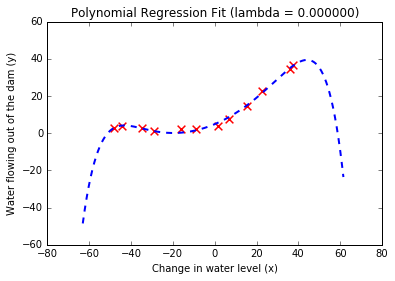

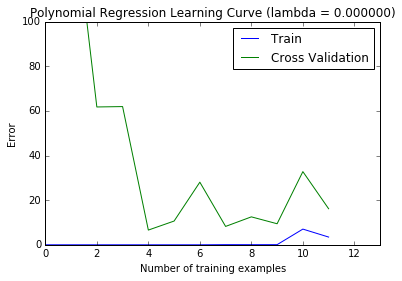

In [176]:
# Part 7: Learning Curve for Polynormial Regression
# 이제 여러가지 lambda값을 가지고 polynomial regression을 시험할 수 있게 된다. 
# 아래 코드는 lambda = 0을 가진 polynomial regression을 실행하는데, 서로 다른 값일 경우 
# 어떻게 fit하고 학습곡선이 변경되는지 확인해라.

def plotFit(min_x, max_x, mu, sigma, theta, p):
    """
    기존 이미지에 학습된 polynomial regression fit을 그린다.
    """
    
    # 우리는 데이터 포인트 범위 밖에서 fit이 어떻게 변화하는지에 대한 아이디어를 얻기 위해서
    # min, max 값보다 다소 크게 범위를 잡아서 그린다.
    
    x = np.arange(min_x - 15, max_x + 24, 0.05)
    x = np.array([x])
    x = x.T
    
    # X값을 매핑한다.
    X_poly = polyFeatures(x, p);
    X_poly = (X_poly - mu) / sigma
    
    # 1을 더한다.
    X_poly = np.column_stack((np.ones((x.shape[0])), X_poly))
    
    # 그린다
    plot(x, X_poly.dot(theta), '--', lw=2)
    

s_lambda = 0

# ************************************************************************************
# XXX: 아래 CG 방식으로는 결과 그래프가 엉뚱하게 그려진다. CG는 BFGS와 무슨 차이가 있을까?
# ************************************************************************************
#theta = trainLinearReg(X_poly, y, s_lambda, method='CG', maxiter=200)
theta = trainLinearReg(X_poly, y, s_lambda, method='BFGS', maxiter=10)

#theta = [11.2045, 11.0382, 16.2291, 13.3606, -16.1602, -19.1341, 10.5450, 6.2101, -5.4437]
#theta = np.array(theta)
print('theta = %s' % theta)
"""
theta =

   11.2045
   11.0382
   16.2291
   13.3606
  -16.1602
  -19.1341
   10.5450
    6.2101
   -5.4437
   
   mu =

  -5.0854e+00   8.4890e+02  -1.2829e+04   1.2897e+06  -2.9831e+07   2.2933e+09  -6.8453e+10   4.4223e+12

sigma =

   2.9964e+01   7.8789e+02   4.8190e+04   1.7349e+06   9.3939e+07   3.8535e+09   1.9793e+11   8.6890e+12
   
"""

#print('mu = %s'% mu)
#print('sigma = %s' % sigma)

# 그래프를 그린다.
# min(X) = -48.059
# max(X) =  37.492
figure(1)
plt.scatter(X, y, c='r', marker='x', s=60, lw=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % s_lambda)

figure(2)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, s_lambda)
plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = %f)' % s_lambda)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 100)
plt.legend(('Train', 'Cross Validation'))
print('Polynomial Regression (lambda = %f)\n\n' % s_lambda)
print('# Training Examples\tTrain Error\tCross Validation Error')

for i in np.arange(m):
    print('  \t%d\t\t%f\t%f' % (i, error_train[i], error_val[i]))
    

### 3.3 Selecting lambda using a cross validation set

연습문제 이전 부분에서, lambda 값이 training과 cross validation set 상에서 regularized polynomial regression 의 결과에 중요하게 영향을 끼침을 볼 수 있었다. 특히, regularization 이 없이(lambda = 0) training set은 잘 맞았지만, 일반화할 수는 없다. 역으로 너무 큰 regularization (lambda = 100)은 training set과 testing set 모두 잘 맞지 않았다. lambda의 좋은 선택(lambda = 1)은 데이터에 잘 맞는다. 

이 섹션에서는, lambda 파라미터를 선택하기 위한 자동화된 방법을 구현한다. __구체적으로 각각의 lmabda 값이 얼마나 좋은지 평가하기 위해 cross validation set을 사용할 것이다.__ cross validation set을 사용해서 가장 좋은 lambda 값을 선택한 이후에, 우리는 test set 에서 model을 평가할 수 있고 실제 보지 못한 데이터 상에서 model이 얼마나 좋은 성능을 낼지 에측할 수 있다.

당신의 작업은 validationCurve.m에 있는 코드를 완성하는 것이다. __특별히, trainLinearReg 함수를 사용해서 model을 훈련시키고 서로 다른 lambda 값을 사용한다. 그리고 training error와 cross validation error를 계산한다.__

lambda를 다음 범위에서 시도해 보라. {0, 0.001, 0.003, 0.001, 0.03, 0.1, 0.3, 1, 3, 10}

코드를 완성한 이후에, ex5.m의 다음 부분은 당신의 함수를 실행시키고 __cross validation curve 에러 대 lambda의 값을 그리는데,__ 어떤 labmbda 파라미터를 사용할지 선택할 수 있게 해준다. 그림 9와 비슷한 plot을 보아야 한다. 이 그림에서, __우리는 lambda의 가장 좋은 값이 3 근처임을 볼 수 있다.__ 데이터셋에서 training과 validation이 무작위로 분리되었기 때문에, cross validation error가 때로는 training error 보다 더 낮을 수 있다.


lambda		Train Error	Validation Error
 0.000000	0.440326	11.476478
 0.001000	0.439376	11.402369
 0.003000	0.437610	11.256038
 0.010000	0.432804	10.762689
 0.003000	0.437610	11.256038
 0.100000	0.519652	6.737096
 0.300000	0.925387	4.587879
 1.000000	2.077703	4.265289
 3.000000	4.901546	3.822889
 10.000000	16.092213	9.945501


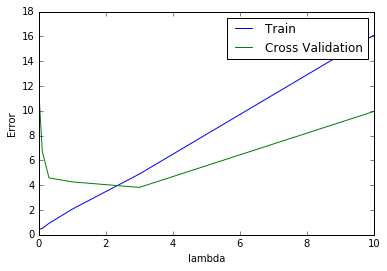

In [182]:
# Part 8: Validation for Selecting Lambda
# validationCurve를 구현해서 validation set상에서 다양한 lambda값을 테스트할 수 있다.
# "best" lambda 값을 선택하기 위해 이것을 사용한다.

def validationCurve(X, y, Xval, yval):
    """
    train과 validation error를 (error_train, error_val에 저장) 서로 다른 lambda값에 대해서
    계산을 한다. training set (X, y)와 validation set (Xval, yval)이 주어진다.
    """
    
    # lambda의 선택된 값들 (이것을 변경해서는 안된다.)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.003, 0.1, 0.3, 1, 3, 10]
    lambda_vec = np.array(lambda_vec)
    
    # 다음 변수들을 올바르게 반환해야 한다.
    error_train = np.zeros(np.size(lambda_vec))
    error_val = np.zeros(np.size(lambda_vec))
    
    """
    벡터 lambda_vec은 서로 다른 lambda 파라미터를 포함하는데 에러의 각 계산에 사용된다.
    예를 들어 error_train(i), error_val(i)는 lambda = lambda_vec(i) 에서 훈련된 이후 
    얻어지는 에러값들이 된다.
    
    Note: 다음과 같이 lambda_vec 에 대해 loop를 실행할 수 있다.
        for i = 1:length(labmda_vec)
        lambda = lambda_vec(i)
    """
    
    # lambda를 증가시키면서 cost J_train과 J_cv의 값을 비교해서 최적의 lambda를 선택한다.
    for i in np.arange(np.size(lambda_vec)):
        s_lambda = lambda_vec[i]
        
        # training 시켜서 최적의 theta를 구한다.
        theta = trainLinearReg(X, y, s_lambda, method='BFGS', maxiter=10)
        
        # train data set에서의 cost J를 구한다.
        # regularization term은 계산에 포함하지 않으므로 lambda = 0으로 설정한다.
        J = linearRegCostFunction(X, y, theta, 0)[0]
        error_train[i] = J
        
        # cross validation set에서의 cost J를 구한다.
        # regularization term은 계산에 포함하지 않으므로 lambda = 0으로 설정한다.
        J = linearRegCostFunction(Xval, yval, theta, 0)[0]
        error_val[i] = J
    
    return lambda_vec, error_train, error_val


lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(('Train', 'Cross Validation'))
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in np.arange(np.size(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))
    